In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [2]:
X = load_iris().data
y = load_iris().target

In [10]:
df = pd.DataFrame(X, columns=load_iris().feature_names )
df['target']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()

In [14]:
df["target"]=encoder.fit_transform(df["target"])

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df = df[df['target']!=0][["sepal width (cm)","petal length (cm)","target"]]

In [17]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-165072496.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


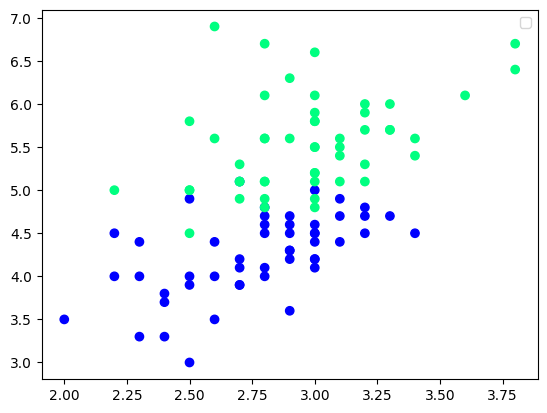

In [22]:
plt.scatter(df["sepal width (cm)"], df["petal length (cm)"], c=df["target"],cmap='winter')
plt.legend()
plt.show()

In [27]:
df_train = df.drop('target',axis=1).sample(10)
df_train

,sepal width (cm),petal length (cm)
142,2.7,5.1
135,3.0,6.1
87,2.3,4.4
58,2.9,4.6
65,3.1,4.4
101,2.7,5.1
64,2.9,3.6
83,2.7,5.1
95,3.0,4.2
76,2.8,4.8


In [53]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10) # taking only 10 rows for trainning
df_val = df.iloc[60:80,:].sample(5) # 5 rows for validation
df_test = df.iloc[80:,:].sample(5) # 5 rows for testing


In [54]:
df_train

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
136,3.4,5.6,2
73,2.8,4.7,1
87,2.3,4.4,1
130,2.8,6.1,2
138,3.0,4.8,2
85,3.4,4.5,1
111,2.7,5.3,2
109,3.6,6.1,2
96,2.9,4.2,1


In [55]:
df_val

,sepal width (cm),petal length (cm),target
147,3.0,5.2,2
120,3.2,5.7,2
124,3.3,5.7,2
128,2.8,5.6,2
83,2.7,5.1,1


In [56]:
df_test

,sepal width (cm),petal length (cm),target
53,2.3,4.0,1
101,2.7,5.1,2
107,2.9,6.3,2
113,2.5,5.0,2
76,2.8,4.8,1


In [57]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([2, 2, 2, 2, 1])

CASE 1 - BAGING

In [58]:
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
130,2.8,6.1,2
109,3.6,6.1,2
50,3.2,4.7,1
85,3.4,4.5,1
96,2.9,4.2,1
130,2.8,6.1,2
111,2.7,5.3,2
85,3.4,4.5,1


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [64]:
def evaluate(clf,x,y):
  clf.fit(x,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred))


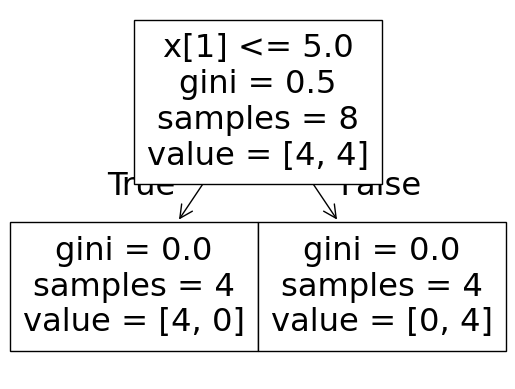

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


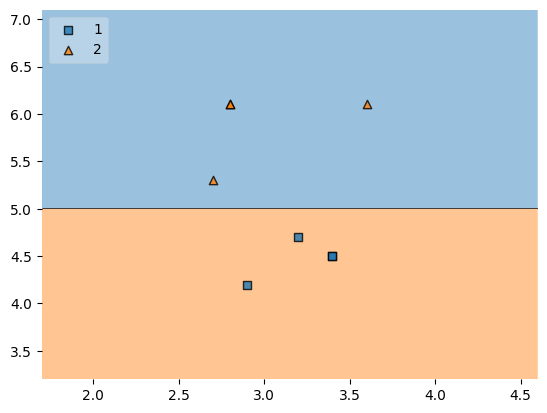

In [66]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [69]:
# data for tree 1
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
138,3.0,4.8,2
130,2.8,6.1,2
138,3.0,4.8,2
96,2.9,4.2,1
96,2.9,4.2,1
111,2.7,5.3,2
109,3.6,6.1,2
136,3.4,5.6,2


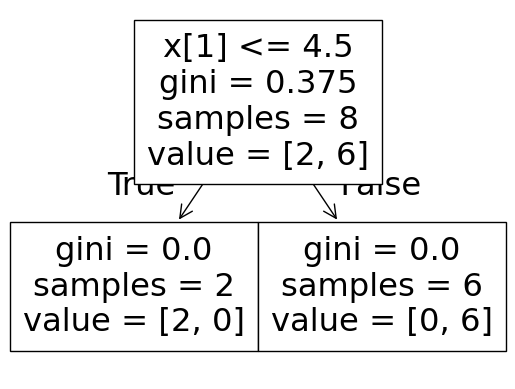

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


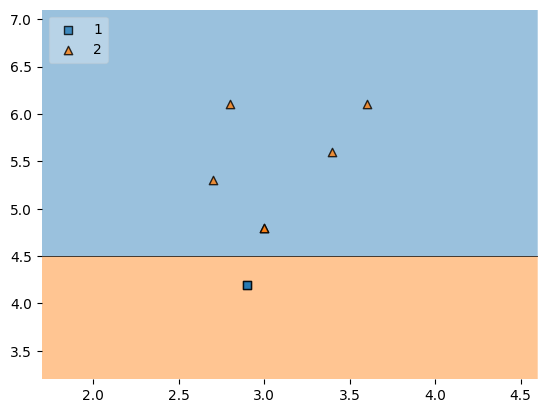

In [70]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [71]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
109,3.6,6.1,2
85,3.4,4.5,1
138,3.0,4.8,2
73,2.8,4.7,1
136,3.4,5.6,2
50,3.2,4.7,1
50,3.2,4.7,1
73,2.8,4.7,1


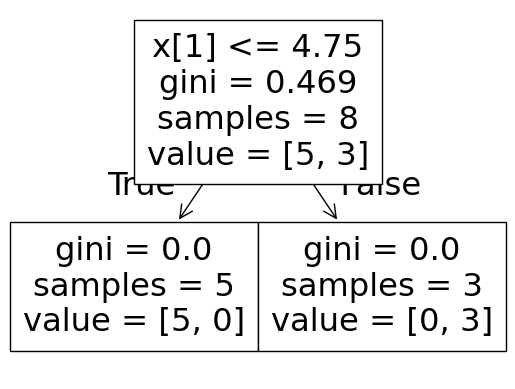

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


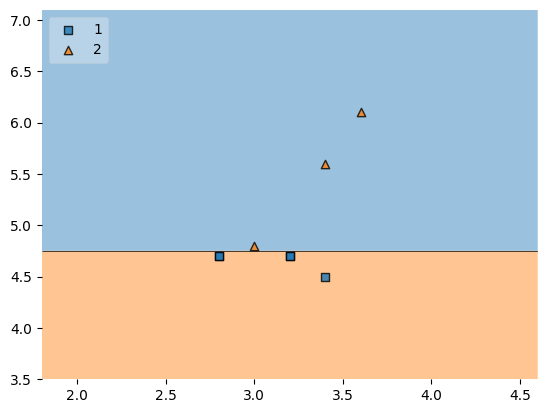

In [72]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

Preiction

In [74]:
df_test

,sepal width (cm),petal length (cm),target
53,2.3,4.0,1
101,2.7,5.1,2
107,2.9,6.3,2
113,2.5,5.0,2
76,2.8,4.8,1


In [78]:
print("predictor1:", dt_bag1.predict(np.array([2.7, 5.1]).reshape(1,2)))
print("predictor2:", dt_bag2.predict(np.array([2.7, 5.1]).reshape(1,2)))
print("predictor3:", dt_bag3.predict(np.array([2.7, 5.1]).reshape(1,2)))

predictor1: [2]
predictor2: [2]
predictor3: [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting

In [79]:
df_train

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
136,3.4,5.6,2
73,2.8,4.7,1
87,2.3,4.4,1
130,2.8,6.1,2
138,3.0,4.8,2
85,3.4,4.5,1
111,2.7,5.3,2
109,3.6,6.1,2
96,2.9,4.2,1


In [82]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
138,3.0,4.8,2
50,3.2,4.7,1
73,2.8,4.7,1
111,2.7,5.3,2
130,2.8,6.1,2
109,3.6,6.1,2
87,2.3,4.4,1
96,2.9,4.2,1
